<a href="https://colab.research.google.com/github/PerdikosFilippos/MNIST-Image-Classification-CNN/blob/main/MNIST_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Set seed fir reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

#Import dependancies

In [36]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

·Import and Process data

In [37]:
#load and prepare the Fashion MNIST dataset . The dataset already exists in Tensorflow
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
#Check type and length of images

In [39]:
type(train_images)

numpy.ndarray

In [40]:
len(train_images)

60000

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
train_images[0].shape

(28, 28)

In [43]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [44]:
#Display an image from the dataset

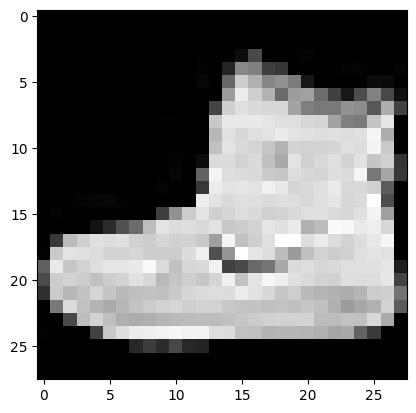

In [45]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [46]:
#What labels do we have?
print(train_labels[0])

9


In [47]:
#Normalize pixel values between 0 and 1
train_images, test_images = train_images/255, test_images/255

In [48]:
#Reshapeimages to SPECIFY that it is a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

#Build the Convolutional Neural Network

In [49]:
#Build Base
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

#Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [50]:
#Compile model
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [51]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4890 - accuracy: 0.8212 - val_loss: 0.3610 - val_accuracy: 0.8737
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3190 - accuracy: 0.8829 - val_loss: 0.3188 - val_accuracy: 0.8848
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2704 - accuracy: 0.9001 - val_loss: 0.2968 - val_accuracy: 0.8951
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2414 - accuracy: 0.9107 - val_loss: 0.2719 - val_accuracy: 0.9008
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2178 - accuracy: 0.9198 - val_loss: 0.2703 - val_accuracy: 0.9048


#Model Evaluation

In [52]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2703 - accuracy: 0.9048 - 700ms/epoch - 2ms/step

Test accuracy: 0.9047999978065491


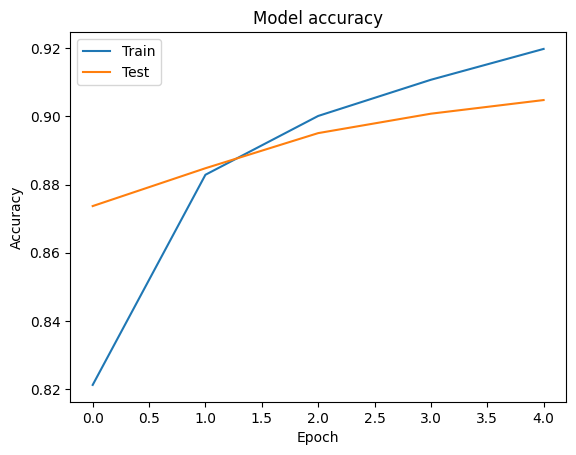

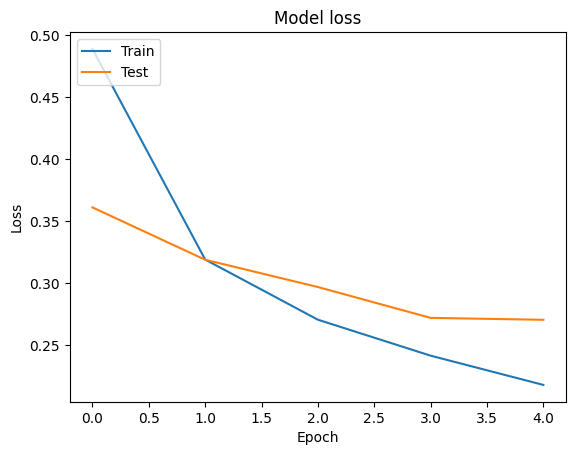

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#SAVE MODEL

In [55]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
